**Names: Philipp Köhler, Alexander Bespalov**


# Sheet 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 1 Bayes: Signal or Noise?

According to Bayes rule:
$$
p(gamma ray|target direction) = \frac{p(target direction|gamma ray) \cdot p(gamma ray)}{p(target direction|background)\cdot p(background) + p(target direction|gamma ray)\cdot p(gamma ray)} =\frac{0.95 \cdot 0.1}{0.1 \cdot 0.9 + 0.95 \cdot 0.1} = \frac{19}{37} \approx 0.514
$$


## 3 QDA
### (a)

In [2]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

In [6]:
unique_labels = np.unique(labels)
means = []
stds = []
for c in unique_labels:
    means.append(np.mean(pts[labels == c]))
    stds.append(np.std(pts[labels == c]))

print("class:",unique_labels)
print("mean:",means)
print("standard deviation:", stds)

class: [0. 1.]
mean: [np.float64(0.10577655907233517), np.float64(2.105667088262294)]
standard deviation: [np.float64(1.0185184414859962), np.float64(1.4196573388063498)]


### (b)

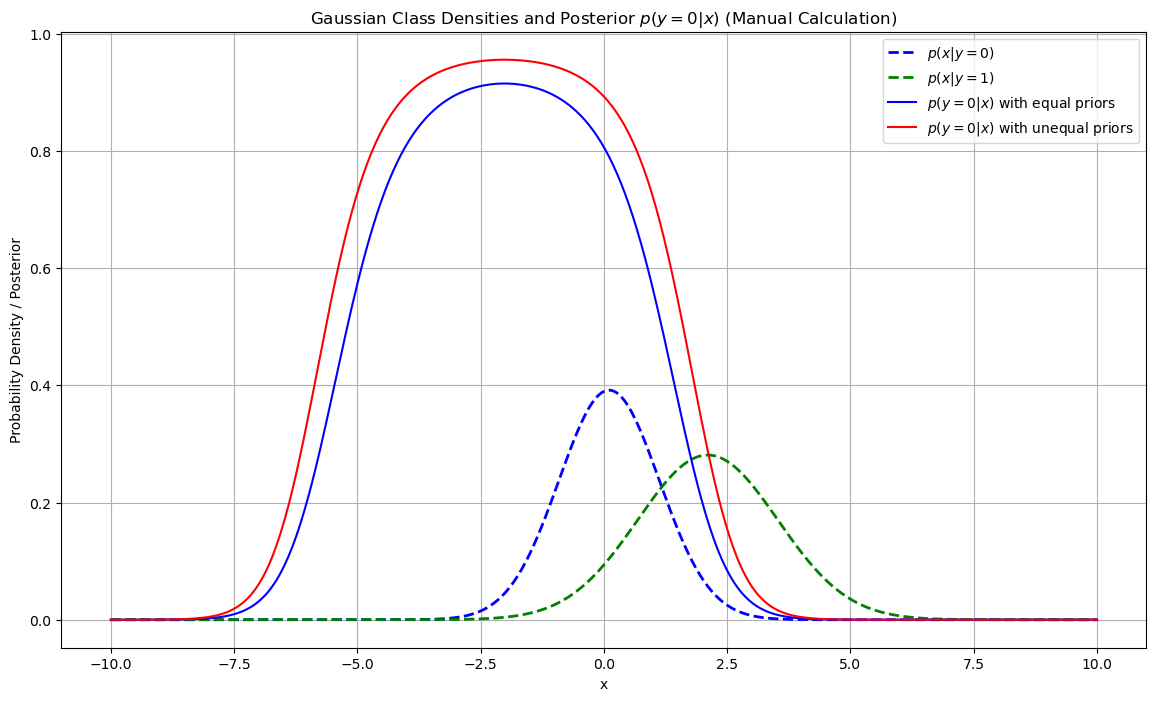

In [10]:
def gaussian_pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-((x - mean)**2) / (2 * std**2))

x_values = np.linspace(-10, 10, 500)

p_x_given_y0 = gaussian_pdf(x_values, means[0], stds[0])  # p(x | y = 0)
p_x_given_y1 = gaussian_pdf(x_values, means[1], stds[1])  # p(x | y = 1)

# equal priors
prior_y0_equal = 0.5
prior_y1_equal = 0.5
posterior_y0_equal = (p_x_given_y0 * prior_y0_equal) / (p_x_given_y0 * prior_y0_equal + p_x_given_y1 * prior_y1_equal)

# unequal priors (p(y=0) = 2 * p(y=1))
prior_y0_unequal = 2/3
prior_y1_unequal = 1/3
posterior_y0_unequal = (p_x_given_y0 * prior_y0_unequal) / (p_x_given_y0 * prior_y0_unequal + p_x_given_y1 * prior_y1_unequal)

plt.figure(figsize=(14, 8))

# Gaussian densities
plt.plot(x_values, p_x_given_y0, label=r"$p(x|y=0)$", color="blue", linestyle="--", linewidth=2)
plt.plot(x_values, p_x_given_y1, label=r"$p(x|y=1)$", color="green", linestyle="--", linewidth=2)

# posterior probabilities with equal priors
plt.plot(x_values, posterior_y0_equal, label=r"$p(y=0|x)$ with equal priors", color="blue")

# posterior probabilities with unequal priors
plt.plot(x_values, posterior_y0_unequal, label=r"$p(y=0|x)$ with unequal priors", color="red")

plt.xlabel("x")
plt.ylabel("Probability Density / Posterior")
plt.title("Gaussian Class Densities and Posterior $p(y=0|x)$ (Manual Calculation)")
plt.legend()
plt.grid(True)
plt.show()

## 4 Trees and Random Forests

### (b)

In [6]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

### (b)

In [7]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

In [9]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set